# **CODSOFT TASK - 1 -- CUSTOMER_CHURN PREDICTION**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression


# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')

In [44]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [45]:
# Drop irrelevant columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [46]:
# Converting the categorical variables into numerical and avoiding Dummy Varibale Trap
final_dataset = pd.get_dummies(data, drop_first=True)

In [47]:
final_dataset.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


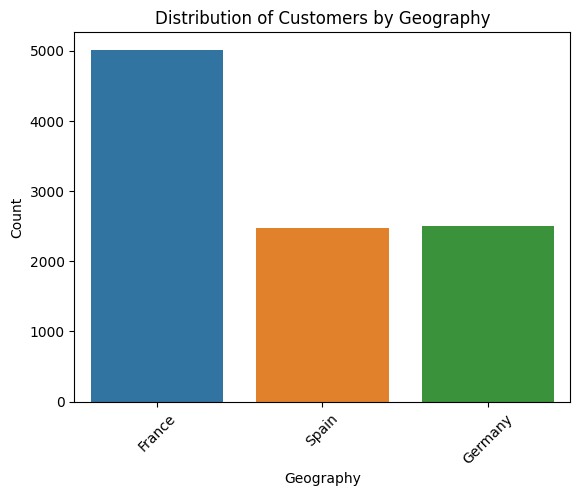

In [48]:
# Create a bar chart for 'Geography'
sns.countplot(x='Geography', data=data)
plt.title('Distribution of Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

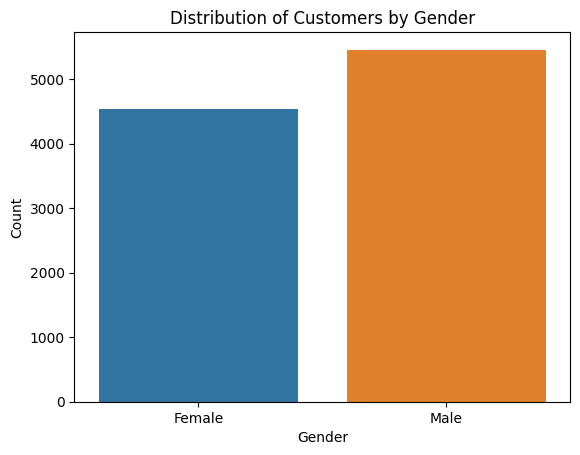

In [49]:
# Create a bar chart for 'Gender'
sns.countplot(x='Gender', data=data)
plt.title('Distribution of Customers by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [57]:
# Encode categorical variables (Geography and Gender)
label_encoder = LabelEncoder()
data['Geography'] = label_encoder.fit_transform(data['Geography'])
data['Gender'] = label_encoder.fit_transform(data['Gender'])

# Split data into features (X) and target (y)
X = data.drop('Exited', axis=1)
y = data['Exited']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train the selected model (e.g., Logistic Regression) on the entire dataset
selected_model = LogisticRegression()
selected_model.fit(X, y)

# Function to predict churn for a specific customer
def predict_churn_for_customer(customer_id):
    # Assuming customer_id is an integer representing the index in the dataset
    customer_data = X[customer_id].reshape(1, -1)
    churn_probability = selected_model.predict_proba(customer_data)[:, 1]
    churn_prediction = 1 if churn_probability >= 0.5 else 0
    return churn_prediction, churn_probability[0]

# Get user input for CustomerID
try:
    customer_id = int(input("Enter the CustomerID to predict churn: "))
    if customer_id >= 0 and customer_id < len(X):
        churn_pred, churn_prob = predict_churn_for_customer(customer_id)
        if churn_pred == 1:
            print(f"Customer with CustomerID {customer_id} is predicted to churn with a probability of {churn_prob:.2f}.")
        else:
            print(f"Customer with CustomerID {customer_id} is predicted to not churn with a probability of {churn_prob:.2f}.")
    else:
        print("Invalid CustomerID. Please enter a valid index.")
except ValueError:
    print("Invalid input. Please enter a valid integer for CustomerID.")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Evaluate models and calculate metrics
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n\n{model_name} Results:")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)

evaluate_model(y_test, lr_pred, "Logistic Regression")


Enter the CustomerID to predict churn: 1500
Customer with CustomerID 1500 is predicted to not churn with a probability of 0.18.


Logistic Regression Results:
Accuracy: 0.815
Precision: 0.5966386554621849
Recall: 0.1806615776081425
F1-Score: 0.27734375
